In [38]:
import pandas as pd

In [39]:
df_Loan = pd.read_csv('data/loan.csv')
df_Loan.shape

(532428, 45)

Make a subset

In [3]:
df_Loan = df_Loan[['member_id', 'loan_amnt', 'funded_amnt', 'addr_state', 'funded_amnt_inv', 'sub_grade', 'term', 'emp_length', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'last_week_pay', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'loan_status']]
df_Loan.shape

(532428, 32)

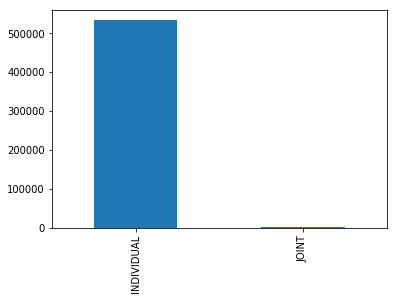

In [42]:
df_Loan.application_type.value_counts().plot(kind='bar')

Replace the term

In [44]:
df_Loan['term'].replace(to_replace=' months', value='', regex=True, inplace=True)
df_Loan['term'] = pd.to_numeric(df_Loan['term'], errors='coerce')
df_Loan['term'].head(5)
df_Loan['emp_length'].unique()

array(['9 years', '< 1 year', '2 years', '10+ years', '5 years',
       '8 years', '7 years', '4 years', nan, '1 year', '3 years',
       '6 years'], dtype=object)

Replace Employee Length

Replace Last Week Pay

In [9]:
df_Loan['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)
df_Loan['last_week_pay'].replace(to_replace='NA', value='', regex=True, inplace=True)
df_Loan['last_week_pay'] = pd.to_numeric(df_Loan['last_week_pay'], errors='coerce')
df_Loan['last_week_pay'].head(5)

0     26.0
1      9.0
2      9.0
3    135.0
4     96.0
Name: last_week_pay, dtype: float64

Missing values imputation - for single column

In [47]:
df_Loan['annual_inc'].isna().sum()
df_Loan['annual_inc'].fillna(df_Loan['annual_inc'].median(), inplace=True)
df_Loan['annual_inc'].isna().sum()
# df_Loan['annual_inc'].isna().sum()

0

This is not great practice by doing each column. Then how?

In [48]:
columns = ['emp_length','open_acc', 'pub_rec', 'emp_length']
for eachColumn in columns:
    df_Loan[eachColumn].fillna(df_Loan[eachColumn].median(), inplace=True)

df_Loan.isna().sum()

TypeError: could not convert string to float: '9 years'

How big the loan a person has taken with respect to his earnings, annual income to loan amount ratio

In [23]:
df_Loan['loan_to_income'] = df_Loan['annual_inc']/df_Loan['funded_amnt_inv']
df_Loan['loan_to_income'].head(5)

0     2.000000
1    13.541667
2     4.500000
3     7.000000
4     3.250000
Name: loan_to_income, dtype: float64

Find bad state based on the delinq, late fee, recovery fee and number of collections 

In [49]:
df_Loan['bad_state'] = df_Loan['acc_now_delinq'] + (df_Loan['total_rec_late_fee']/df_Loan['funded_amnt_inv']) + (df_Loan['recoveries']/df_Loan['funded_amnt_inv']) + (df_Loan['collection_recovery_fee']/df_Loan['funded_amnt_inv']) + (df_Loan['collections_12_mths_ex_med']/df_Loan['funded_amnt_inv'])
df_Loan[df_Loan['bad_state'] > 1].bad_state


228       2.000000
733       2.002083
1132      1.000046
1595      1.001263
3002      2.000000
3749      2.000000
4681      1.000125
5618      2.000000
10424     2.000000
13024     1.651466
13786     4.000000
16494     3.000000
18093     1.144802
21042     1.000167
21606     1.031375
21716     1.089484
25270     1.271072
25351     2.000000
26148     2.000000
26433     2.001663
26470     1.003750
28088     1.128264
30815     1.002516
30878     1.000167
31164     2.000000
31316     2.000000
31665     2.000000
36903     1.147427
37073     1.000100
38486     1.126290
            ...   
503951    1.136428
505050    2.000000
505450    1.020704
506920    1.000084
508502    1.078128
510787    2.000000
512156    1.000500
512267    2.000000
512832    2.202159
513790    1.216096
514327    2.000000
514913    1.000040
516498    1.000064
517112    1.000128
517646    1.001163
518340    1.000056
519001    2.000000
519615    2.000000
521141    1.000036
521475    2.000000
521774    2.000000
526129    2.

 Interest paid so far

In [36]:
df_Loan['int_paid'] =  df_Loan['total_rec_int'] + df_Loan['total_rec_late_fee']
df_Loan['int_paid'].head(5)

0    1173.84
1      83.95
2      56.47
3    4858.62
4    2296.41
Name: int_paid, dtype: float64